***
# Demo Jupyter Notebook for the EMS21 User Workshop ![AtMoDat Image](https://www.dkrz.de/en/projects-and-partners/projects-1/atmodat-1/@@images/logo/preview)
***
## Standardized, FAIR and CF-compliant publication of urban climate model data.
          for details, please see https://meetingorganizer.copernicus.org/EMS2021/session/41771#

<div class="alert-info" role="alert">
  <h4 class="alert-heading"><span style="font-family: Arial; font-size:1.4em;color:black;"> README</h4>
  <p><span style="font-family: Arial; font-size:1.0em;color:black;"> – For demonstration purposes, we use a netCDF file created from CMIP6 model output. <br> 
      – We prepared test netCDF files are stored in the directory.  </p> To to execute BASH commands in a cell, put %%bash in the first line of that cell.</p>
  <hr>
</div>

### Step 1: Check available netCDF files in demo_data directory

using BASH listing command `ls`  (-lh option to print out details on files inlcuding human-readible file sizes)

In [1]:
%%bash
ls -lh demo_data/*.nc

-rw-r--r--  1 angelika  staff    54K  5 Sep 14:02 demo_data/ALL_ATMODAT_ATTRIBUTES.nc
-rw-r--r--  1 angelika  staff    51K 26 Aug 16:56 demo_data/CMIP6_ATTRIBUTES.nc
-rw-r--r--  1 angelika  staff    27K 27 Aug 09:55 demo_data/MINUM_ATMODAT_ATTRIBUTES.nc
-rw-r--r--  1 angelika  staff    26K 27 Aug 09:55 demo_data/NO_ATTRIBUTES.nc
-rw-r--r--  1 angelika  staff    27K 27 Aug 10:16 demo_data/WRONG_STANDARDNAME.nc


### Step 2: Exploring netCDF file content with NCOs

using the BASH terminal command `ncatted -h`   (-h options means that only the netCDF header is shown)

#### Step 2.1: This is how a CMIP6 netCDF file looks without any metadata

In [16]:
%%bash
ncdump -h demo_data/NO_ATTRIBUTES.nc

netcdf NO_ATTRIBUTES {
dimensions:
	lat = 9 ;
	lon = 11 ;
	time = UNLIMITED ; // (8 currently)
variables:
	double lat(lat) ;
	double lon(lon) ;
	float ps(time, lat, lon) ;
	float tas(time, lat, lon) ;
	double time(time) ;
}


#### Step 2.2: This is how a CMIP6 netCDF file looks that contains all mandatory ATMODAT Standard attributes

In [ ]:
%%bash
ncdump -h demo_data/ALL_ATMODAT_ATTRIBUTES.nc

#### Step 2.2: This is how a CMIP6 netCDF file looks that contains all ATMODAT Standard attributes (mandatory, recommended, optional)

In [21]:
%%bash
ncdump -h demo_data/MINUM_ATMODAT_ATTRIBUTES.nc

netcdf MINUM_ATMODAT_ATTRIBUTES {
dimensions:
	lat = 9 ;
	lon = 11 ;
	time = UNLIMITED ; // (8 currently)
variables:
	double lat(lat) ;
		lat:long_name = "Latitude" ;
		lat:units = "degrees_north" ;
	double lon(lon) ;
		lon:long_name = "Longitude" ;
		lon:units = "degrees_east" ;
	float ps(time, lat, lon) ;
		ps:long_name = "Surface Air Pressure" ;
		ps:units = "Pa" ;
	float tas(time, lat, lon) ;
		tas:long_name = "Near-Surface Air Temperature" ;
		tas:units = "K" ;
	double time(time) ;
		time:long_name = "time" ;
		time:units = "days since 1850-1-1 00:00:00" ;
		time:calendar = "proleptic_gregorian" ;

// global attributes:
		:Conventions = "CF-1.8 ATMODAT-3.0" ;
		:institution = "Max Planck Institute for Meteorology" ;
		:source = "MPI-ESM1.2-HR (2017)" ;
}


#### Step 2.3: This is how the original metadata look like in a CMIP6 netCDF file

In [18]:
%%bash
ncdump -h demo_data/CMIP6_ATTRIBUTES.nc

netcdf CMIP6_ATTRIBUTES {
dimensions:
	time = UNLIMITED ; // (8 currently)
	lon = 11 ;
	bnds = 2 ;
	lat = 9 ;
variables:
	double time(time) ;
		time:standard_name = "time" ;
		time:long_name = "time" ;
		time:units = "days since 1850-1-1 00:00:00" ;
		time:calendar = "proleptic_gregorian" ;
		time:axis = "T" ;
	double lon(lon) ;
		lon:standard_name = "longitude" ;
		lon:long_name = "Longitude" ;
		lon:units = "degrees_east" ;
		lon:axis = "X" ;
		lon:bounds = "lon_bnds" ;
	double lon_bnds(lon, bnds) ;
	double lat(lat) ;
		lat:standard_name = "latitude" ;
		lat:long_name = "Latitude" ;
		lat:units = "degrees_north" ;
		lat:axis = "Y" ;
		lat:bounds = "lat_bnds" ;
	double lat_bnds(lat, bnds) ;
	double height ;
		height:standard_name = "height" ;
		height:long_name = "height" ;
		height:units = "m" ;
		height:positive = "up" ;
		height:axis = "Z" ;
	float ps(time, lat, lon) ;
		ps:standard_name = "surface_air_pressure" ;
		ps:long_name = "Surface Air Pressure" ;
		ps:units = "Pa" ;
		ps:C

### Step 3: Exploring netCDF file content with xarray.

#### Import required Python modules

In [1]:
import xarray as xr

#### Step 3.1: Read in unstandardised CMIP6 netCDF file demo_data/NOATTRIBUTES.nc

In [2]:
ifile1 = 'demo_data/NO_ATTRIBUTES.nc'
ds1    = xr.open_dataset(ifile1)

####  Step 3.2: Have a look at the file content


In [10]:
ds1

<xarray.Dataset>
Dimensions:  (lat: 9, lon: 11, time: 8)
Coordinates:
  * lat      (lat) float64 47.22 48.16 49.09 50.03 50.96 51.9 52.83 53.77 54.7
  * lon      (lon) float64 5.625 6.562 7.5 8.438 ... 12.19 13.12 14.06 15.0
  * time     (time) float64 5.863e+04 5.863e+04 ... 5.863e+04 5.863e+04
Data variables:
    ps       (time, lat, lon) float32 9.817e+04 9.523e+04 ... 1.018e+05
    tas      (time, lat, lon) float32 293.7 291.3 289.6 ... 293.5 293.2 292.6

<span style="color:red">**This unstandardised file has no metadata describing the data. <br>It remains unclear what the variables pr and tas are representing and what units they have.**</span>

####  Step 3.3: Plot the first time step of variable tas

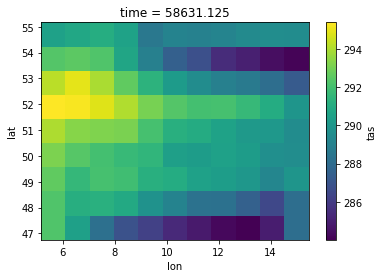

In [11]:
ds1.tas.isel(time=1).plot()

<span style="color:red">**--> Without metadata, the plotting routine cannot correctly label the plot .**</span>


####  Step 3.4: Read a CMIP6 file that is standardised according to the ATMODAT Standard (same data as file1 but with rich metadata)

In [12]:
ifile2 = 'demo_data/ALL_ATMODAT_ATTRIBUTES.nc'
ds2    = xr.open_dataset(ifile2)

##### Have a look at the file content
* Click on the file icon next to the database icon to view the attributes of the individual coordinate and data variables. 
* click on the $\nabla$ Attributes to look at the 30 global attributes.

In [13]:
ds2

<xarray.Dataset>
Dimensions:  (lat: 9, lon: 11, time: 8)
Coordinates:
  * lat      (lat) float64 47.22 48.16 49.09 50.03 50.96 51.9 52.83 53.77 54.7
  * lon      (lon) float64 5.625 6.562 7.5 8.438 ... 12.19 13.12 14.06 15.0
  * time     (time) datetime64[ns] 2010-07-12 ... 2010-07-12T21:00:00
Data variables:
    ps       (time, lat, lon) float32 ...
    tas      (time, lat, lon) float32 ...
Attributes: (12/30)
    source:                          MPI-ESM1.2-HR (2017): \naerosol: none, p...
    institution:                     Max Planck Institute for Meteorology
    contact:                         cmip6-mpi-esm@dkrz.de
    creation_date:                   2019-08-25T09:49:09Z
    frequency:                       3hrPt
    further_info_url:                https://furtherinfo.es-doc.org/CMIP6.MPI...
    ...                              ...
    keywords_vocabulary:             GCMD
    metadata_link:                   https://cera-www.dkrz.de/WDCC/ui/cerasea...
    processing_level:                not applicable; data are model data
    program:                         CMIP6
    project:                         CMIP6
    Conventions:                     CF-1.8 ATMODAT-3.0

####  Step 3.5: Plot first time step of variable tas

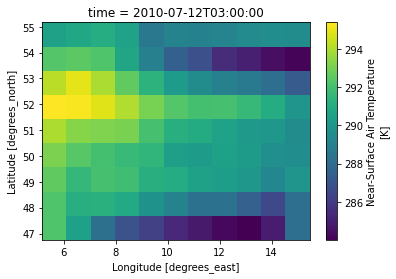

In [36]:
ds2.tas.isel(time=1).plot()

<span style="color:red">**--> With metadata, the plotting routine automatically labels the plot with units .**</span>

## Step 4: Evaluate the netCDF files with the atmodat checker
*Notes* <br>
* Run the atmodat checker using the command `run_checks.py` from BASH terminal.
* Please note that the atmodat checker contains two modules:
    * one that checks the global attributes for compliance with the ATMODAT standard, 
    * and another that performs a standard CF check (building upon the cfchecks library).

#### Step 4.1: Show usage instructions of the `run_checks.py`

In [15]:
%%bash
run_checks.py --help

usage: run_checks.py [-h] [-v] [-op OPATH] [-cfv CFVERSION]
                     [-check WHATCHECKS] [-s] [-f FILE | -p PATH]

Run the AtMoDat checks suits.

optional arguments:
  -h, --help            show this help message and exit
  -v, --verbose         Print output of checkers (longer runtime due to double
                        call of checkers)
  -op OPATH, --opath OPATH
                        Define custom path where checker output shall be
                        written
  -cfv CFVERSION, --cfversion CFVERSION
                        Define custom CF table version against which the file
                        shall be checked. Valid are versions from 1.3 to 1.8.
                        Example: "-cfv 1.6". Default is 'auto'
  -check WHATCHECKS, --whatchecks WHATCHECKS
                        Define if AtMoDat or CF check or both shall be
                        executed. Valid options: AT, CF, both. Example:
                        "-check CF". Default is 'both'
  -s, --sum

#### Step 4.2: Check the file ALL_ATMODAT_ATTRIBUTES.nc and write checker output to output directory *myoutputdir*
*Notes* <br>
* Without specifying a user-defined output directory (-op flag), the atmodat checker would write the checker output into  ../checker_ouput/YYYYMMDD_HHMM
* We use the -s option to create summary checker output (files: short_summary.txt and long_summary_*.csv)

In [127]:
%%bash
run_checks.py -s -f demo_data/ALL_ATMODAT_ATTRIBUTES.nc -op myoutputdir

2021-09-05 16:09:41.974204 [INFO] :: PYESSV :: Loading vocabularies from /Users/angelika/Checker/atmodat_data_checker/AtMoDat_CVs/pyessv-archive:
2021-09-05 16:09:41.980479 [INFO] :: PYESSV :: ... loaded: atmodat
--- 1.3286 seconds for checking 1 files---


Running Compliance Checker on the datasets from: ['demo_data/ALL_ATMODAT_ATTRIBUTES.nc']


#### Step 4.3: Check content of the checker output directory myoutputdir

##### Step 4.3.1: List folders and subfolders

In [141]:
%%bash
ls -g myoutputdir
echo $'\n=====  atmodat subdirectory with detailed checker output ===='
#echo '\n =====  atmodat subdirectory with detailed checker output ===='
ls -g myoutputdir/atmodat
echo $'\n======  CF subdirectory with detailed checker output ===='
ls -g myoutputdir/CF

total 32
drwxr-xr-x  3 staff   96  5 Sep 18:09 CF
drwxr-xr-x  3 staff   96  5 Sep 18:09 atmodat
-rw-r--r--  1 staff   49  5 Sep 18:09 long_summary_mandatory.csv
-rw-r--r--  1 staff   49  5 Sep 18:09 long_summary_optional.csv
-rw-r--r--  1 staff   49  5 Sep 18:09 long_summary_recommended.csv
-rw-r--r--  1 staff  332  5 Sep 18:09 short_summary.txt

=====  atmodat subdirectory with detailed checker output ====
total 32
-rw-r--r--  1 staff  13562  5 Sep 18:09 ALL_ATMODAT_ATTRIBUTES_atmodat_result.json

======  CF subdirectory with detailed checker output ====
total 8
-rw-r--r--  1 staff  693  5 Sep 18:09 ALL_ATMODAT_ATTRIBUTES_cfchecks_result.txt


##### Step 4.3.2: Show content of short_summary.txt that provides summary statistics on the atmodat checker and CF checker results  

In [143]:
%%bash
cat myoutputdir/short_summary.txt

Short summary of checks: 
 
Checking against: atmodat_standard:3.0, CF table version: 77
Version of the AtMoDat checker: 1.1.0
Checked at: 2021-09-05T18:09:42.725622
 
Number of checked files: 1
Total checks passed: 31/31
Mandatory checks passed: 4/4
Recommended checks passed: 18/18
Optional checks passed: 9/9
CF checker errors: 0

##### Step 4.3.2: Show content of long_summary_recommended.csv

In [145]:
%%bash
cat myoutputdir/long_summary_recommended.csv

File,Check level,Global Attribute,Error Message


<span style="color:red">**--> File contains all recommended metadata, so the long_summary has no entry except of the header .**</span>

##### Step 4.3.3: Show content of the output file that contains the check against the ATMODAT Standard (machine readible JSON file)

In [147]:
%%bash
head -60  myoutputdir/atmodat/ALL_ATMODAT_ATTRIBUTES_atmodat_result.json

{
  "demo_data/ALL_ATMODAT_ATTRIBUTES.nc": {
    "atmodat_standard:3.0": {
      "scored_points": 110,
      "possible_points": 110,
      "high_count": 0,
      "medium_count": 0,
      "low_count": 0,
      "high_priorities": [
        {
          "name": "ATMODAT version number in valid range",
          "weight": 3,
          "value": [
            3,
            3
          ],
          "msgs": [],
          "children": []
        },
        {
          "name": "CF version number in valid range",
          "weight": 3,
          "value": [
            3,
            3
          ],
          "msgs": [],
          "children": []
        },
        {
          "name": "Global attribute: Conventions",
          "weight": 3,
          "value": [
            4,
            4
          ],
          "msgs": [],
          "children": []
        },
        {
          "name": "Global attribute: institution",
          "weight": 3,
          "value": [
            4,
            4
          

#### Step 4.3.4: Show content of the output file that contains the check against the CF Standard
The output formatting is preset by the cfchecks routine

In [148]:
%%bash
cat myoutputdir/CF/ALL_ATMODAT_ATTRIBUTES_cfchecks_result.txt

CHECKING NetCDF FILE: demo_data/ALL_ATMODAT_ATTRIBUTES.nc
Using CF Checker Version 4.1.0
Checking against CF Version CF-1.8
Using Standard Name Table Version 77 (2021-01-19T13:38:50Z)
Using Area Type Table Version 10 (23 June 2020)
Using Standardized Region Name Table Version 4 (18 December 2018)


------------------
Checking variable: lat
------------------

------------------
Checking variable: lon
------------------

------------------
Checking variable: ps
------------------

------------------
Checking variable: tas
------------------

------------------
Checking variable: time
------------------

ERRORS detected: 0
WARNINGS given: 0
INFORMATION messages: 0


#### Step 4.3: Check all files contained in directory demo_data and write checker output to output directory *myoutputdir2*
*Notes* <br>
* Let the checker run over all files contained in the entire directory demo_data (-p flag).
* Write checker output to output directory *myoutputdir2* (-op flag).
* We use the -s option to create summary checker output (files: short_summary.txt and long_summary_*.csv)

In [151]:
%%bash
run_checks.py -s -p demo_data/ -op myoutputdir2

2021-09-05 17:20:31.971813 [INFO] :: PYESSV :: Loading vocabularies from /Users/angelika/Checker/atmodat_data_checker/AtMoDat_CVs/pyessv-archive:
2021-09-05 17:20:32.004392 [INFO] :: PYESSV :: ... loaded: atmodat
2021-09-05 17:20:33.981522 [INFO] :: PYESSV :: Loading vocabularies from /Users/angelika/Checker/atmodat_data_checker/AtMoDat_CVs/pyessv-archive:
2021-09-05 17:20:33.988536 [INFO] :: PYESSV :: ... loaded: atmodat
2021-09-05 17:20:35.413978 [INFO] :: PYESSV :: Loading vocabularies from /Users/angelika/Checker/atmodat_data_checker/AtMoDat_CVs/pyessv-archive:
2021-09-05 17:20:35.421006 [INFO] :: PYESSV :: ... loaded: atmodat
2021-09-05 17:20:36.843643 [INFO] :: PYESSV :: Loading vocabularies from /Users/angelika/Checker/atmodat_data_checker/AtMoDat_CVs/pyessv-archive:
2021-09-05 17:20:36.850002 [INFO] :: PYESSV :: ... loaded: atmodat
2021-09-05 17:20:38.297479 [INFO] :: PYESSV :: Loading vocabularies from /Users/angelika/Checker/atmodat_data_checker/AtMoDat_CVs/pyessv-archive:
20

Running Compliance Checker on the datasets from: ['demo_data/WRONG_STANDARDNAME.nc']
Running Compliance Checker on the datasets from: ['demo_data/CMIP6_ATTRIBUTES.nc']
Running Compliance Checker on the datasets from: ['demo_data/NO_ATTRIBUTES.nc']
Running Compliance Checker on the datasets from: ['demo_data/MINUM_ATMODAT_ATTRIBUTES.nc']
Running Compliance Checker on the datasets from: ['demo_data/ALL_ATMODAT_ATTRIBUTES.nc']


#### Step 4.4: Check content of the checker output directory myoutputdir2

##### Step 4.4.1: List folders and subfolders

In [152]:
%%bash
ls -g myoutputdir2
echo $'\n=====  atmodat subdirectory with detailed checker output ===='
#echo '\n =====  atmodat subdirectory with detailed checker output ===='
ls -g myoutputdir2/atmodat
echo $'\n======  CF subdirectory with detailed checker output ===='
ls -g myoutputdir2/CF

total 40
drwxr-xr-x  7 staff   224  5 Sep 19:20 CF
drwxr-xr-x  7 staff   224  5 Sep 19:20 atmodat
-rw-r--r--  1 staff   287  5 Sep 19:20 long_summary_mandatory.csv
-rw-r--r--  1 staff  2672  5 Sep 19:20 long_summary_optional.csv
-rw-r--r--  1 staff  5099  5 Sep 19:20 long_summary_recommended.csv
-rw-r--r--  1 staff   337  5 Sep 19:20 short_summary.txt

=====  atmodat subdirectory with detailed checker output ====
total 184
-rw-r--r--  1 staff  13562  5 Sep 19:20 ALL_ATMODAT_ATTRIBUTES_atmodat_result.json
-rw-r--r--  1 staff  15931  5 Sep 19:20 CMIP6_ATTRIBUTES_atmodat_result.json
-rw-r--r--  1 staff  17472  5 Sep 19:20 MINUM_ATMODAT_ATTRIBUTES_atmodat_result.json
-rw-r--r--  1 staff  16891  5 Sep 19:20 NO_ATTRIBUTES_atmodat_result.json
-rw-r--r--  1 staff  17460  5 Sep 19:20 WRONG_STANDARDNAME_atmodat_result.json

======  CF subdirectory with detailed checker output ====
total 40
-rw-r--r--  1 staff   693  5 Sep 19:20 ALL_ATMODAT_ATTRIBUTES_cfchecks_result.txt
-rw-r--r--  1 staff  1006

##### Step 4.4.2: Show content of short_summary.txt that provides summary statistics on the atmodat checker and CF checker results  

In [153]:
%%bash
cat myoutputdir2/short_summary.txt

Short summary of checks: 
 
Checking against: atmodat_standard:3.0, CF table version: 77
Version of the AtMoDat checker: 1.1.0
Checked at: 2021-09-05T19:20:39.181847
 
Number of checked files: 5
Total checks passed: 54/153
Mandatory checks passed: 15/18
Recommended checks passed: 28/90
Optional checks passed: 11/45
CF checker errors: 1

##### Step 4.4.2: Show content of long_summary_mandatory.csv

In [154]:
%%bash
cat myoutputdir2/long_summary_mandatory.csv

File,Check level,Global Attribute,Error Message
,,,
CMIP6_ATTRIBUTES.nc,mandatory,Conventions,ATMODAT Standard information not present
,,,
NO_ATTRIBUTES.nc,mandatory,Conventions,global attribute is not present
NO_ATTRIBUTES.nc,mandatory,institution,global attribute is not present


<span style="color:red">**--> lon_summary_mandatory.txt lists all mandatory errors detected in any file contained in the directory demo_data. <br> 
    The content of the global attribute *Conventions* is 'CF-1.7 CMIP-6.2' , but for meeting the ATMODAT Standard, this attribute has to be 'CF-1.8 ATMODAT-3.0'**</span>

##### Step 4.4.3: Show content of long_summary_recommended.csv

In [161]:
%%bash
head -20 myoutputdir2/long_summary_recommended.csv

File,Check level,Global Attribute,Error Message
,,,
CMIP6_ATTRIBUTES.nc,recommended,creator,global attribute is not present
CMIP6_ATTRIBUTES.nc,recommended,crs,global attribute is not present
CMIP6_ATTRIBUTES.nc,recommended,geospatial_lat_resolution,global attribute is not present.
CMIP6_ATTRIBUTES.nc,recommended,geospatial_lon_resolution,global attribute is not present.
CMIP6_ATTRIBUTES.nc,recommended,geospatial_vertical_resolution,global attribute is not present
CMIP6_ATTRIBUTES.nc,recommended,keywords,global attribute is not present
CMIP6_ATTRIBUTES.nc,recommended,standard_name_vocabulary,global attribute is not present
CMIP6_ATTRIBUTES.nc,recommended,summary,global attribute is not present
,,,
MINUM_ATMODAT_ATTRIBUTES.nc,recommended,contact,global attribute is not present
MINUM_ATMODAT_ATTRIBUTES.nc,recommended,creation_date,global attribute is not present
MINUM_ATMODAT_ATTRIBUTES.nc,recommended,creator,global attribute is not present
MINUM_ATMODAT_ATTRIBUTES.nc,recommended,crs,glo

##### Step 4.4.4: Show content of the output file that contains the check against the ATMODAT Standard (machine readible JSON file)

In [162]:
%%bash
head -40  myoutputdir2/atmodat/NO_ATTRIBUTES_atmodat_result.json

{
  "demo_data/NO_ATTRIBUTES.nc": {
    "atmodat_standard:3.0": {
      "scored_points": 0,
      "possible_points": 104,
      "high_count": 2,
      "medium_count": 18,
      "low_count": 9,
      "high_priorities": [
        {
          "name": "Global attribute: Conventions",
          "weight": 3,
          "value": [
            0,
            4
          ],
          "msgs": [
            "'Conventions' global attribute is not present"
          ],
          "children": []
        },
        {
          "name": "Global attribute: institution",
          "weight": 3,
          "value": [
            0,
            4
          ],
          "msgs": [
            "'institution' global attribute is not present"
          ],
          "children": []
        }
      ],
      "medium_priorities": [
        {
          "name": "Global attribute: contact",
          "weight": 2,
          "value": [
            0,


##### Step 4.4.4: Check which file provoked an error message in the CF checker

In [175]:
%%bash
ls -l myoutputdir2/CF


grep -l Invalid myoutputdir2/CF/*.txt

total 40
-rw-r--r--  1 angelika  staff   693  5 Sep 19:20 ALL_ATMODAT_ATTRIBUTES_cfchecks_result.txt
-rw-r--r--  1 angelika  staff  1006  5 Sep 19:20 CMIP6_ATTRIBUTES_cfchecks_result.txt
-rw-r--r--  1 angelika  staff   695  5 Sep 19:20 MINUM_ATMODAT_ATTRIBUTES_cfchecks_result.txt
-rw-r--r--  1 angelika  staff  1484  5 Sep 19:20 NO_ATTRIBUTES_cfchecks_result.txt
-rw-r--r--  1 angelika  staff   829  5 Sep 19:20 WRONG_STANDARDNAME_cfchecks_result.txt
myoutputdir2/CF/WRONG_STANDARDNAME_cfchecks_result.txt


#### Check all files in the directory demo_data and and put the output into the folder checkeroutput. Also include a test summary (option -s)

# APPENDIX

#### How the CMIP6 sample files were prepared 
See more details on the CMIP6 experiment: https://cera-www.dkrz.de/WDCC/ui/cerasearch/cmip6?input=CMIP6.CMIP.MPI-M.MPI-ESM1-2-HR.historical <br>

##### Merge the variables ps and tas into a single netCDF file, subset region of Germany and select the day 2010-07-12

##### Modify the CMIP6 metadata to create the files: NOATTRIBUTES.nc, MINUM_ATMODAT_ATTRIBUTES.nc, WRONG_STANDARD_NAME.nc

##### Modify the CMIP6 metadata to create the file: ALL_ATMODAT_ATTRIBUTES.nc

In [176]:
%%bash

creator='Jungclaus, Johann, https://orcid.org/0000-0002-3849-4339 et al.'     #-- optimally add full list of creators; 
# for CMIP6, the list would be very long, https://cera-www.dkrz.de/WDCC/ui/cerasearch/cmip6?input=CMIP6.CMIP.MPI-M.MPI-ESM1-2-HR.historical.r6i1p1f1.6hrPlev.tas.gn.v20190815 which is why we truncate it in this example file
crs='WGS84 (T127 gaussian grid)'                                              #-- gridtype is Gaussian, globally 384 x 192 longitude/latitude
geospatial_lat_resolution='0.94 degree'                                          #-- approximate value   
geospatial_lon_resolution='0.9375 degree' 
geospatial_vertical_resolution='point'                                        #-- only surface layer
keywords='CMIP, COUPLED CLIMATE MODELS'
standard_name_vocabulary='CF Standard Name Table v77'
summary='These data have been generated as part of the internationally-coordinated Coupled Model Intercomparison Project Phase 6 (CMIP6; see also GMD Special Issue: http://www.geosci-model-dev.net/special_issue590.html). The data contained in this file represents MPI-M MPI-ESM1.2-HR model output prepared for CMIP6 CMIP historical.'
comment='This file has been prepared for the EMS21 user workshop https://meetingorganizer.copernicus.org/EMS2021/session/41771. The user workshop focusses on netCDF metadata. '
featureType='point'
keywords_vocabulary='GCMD'


metadata_link='https://cera-www.dkrz.de/WDCC/ui/cerasearch/cmip6?input=CMIP6.CMIP.MPI-M.MPI-ESM1-2-HR'
processing_level='not applicable; data are model data'
program='CMIP6'
project='CMIP6'

cp -p demo_data/CMIP6_ATTRIBUTES.nc demo_data/ALL_ATMODAT_ATTRIBUTES.nc


#-- Recommended ATMODAT global attributes NOT contained in CMIP6 attributes:
rec_att_AS_miss="'creator' 'crs' 'geospatial_lat_resolution' 'geospatial_lon_resolution' 'geospatial_vertical_resolution' 'keywords' 'standard_name_vocabulary' 'summary'"
rec_att_AS_mand="'Conventions' 'institution' 'source'"
rec_att_AS_rec="''contact' 'creation_date' 'creator' 'crs' 'frequency' 'geospatial_lat_resolution' 'geospatial_lon_resolution' 'geospatial_vertical_resolution' 'history' 'institution_id' 'keywords' 'license' 'nominal_resolution' 'realm' 'source_type' 'standard_name_vocabulary' 'summary' 'title'"
rec_att_AS_opt="'comment' 'featureType' 'further_info_url' 'keywords_vocabulary' 'metadata_link' 'processing_level' 'program' 'project' 'references'"
conv_att_AS='CF-1.8 ATMODAT-3.0'                            #-- required Conventions entry in ATMODAT Standard
conv_att_C6='CF-1.7 CMIP-6.2'                               #-- required Conventions entry in CMIP6 Standard



#-- Get all CMIP6 global attributes
rec_att_C6_all=`ncdump -h demo_data/ALL_ATMODAT_ATTRIBUTES.nc|grep '\s:'|cut -d: -f2|cut -d= -f1|tr -d ' '|sed -e "s/^/'/" -e "s/$/' /"|tr -d '\n'`

#-- Remove all CMIP6 global attributes that are not requiered for the ATMODAT standard
for rec in $rec_att_C6_all;do
    rec2=`echo $rec|tr -d \'\" `
    grep_res=`echo $rec_att_AS_mand $rec_att_AS_rec $rec_att_AS_opt |grep $rec2`
    if [ -z "${grep_res}" ]; then
        ncatted -O -h -a $rec2,global,d,, demo_data/ALL_ATMODAT_ATTRIBUTES.nc
    fi
done

#-- Get all CMIP6 global attributes that are also ATMODAT global attributes
rec_att_C6_min=`ncdump -h demo_data/ALL_ATMODAT_ATTRIBUTES.nc|grep '\s:'|cut -d: -f2|cut -d= -f1|tr -d ' '|sed -e "s/^/'/" -e "s/$/' /"|tr -d '\n'`


#-- Get all ATMODAT global attributes that are not provided by the CMIP6 global attributes
for rec in $rec_att_AS_mand $rec_att_AS_rec $rec_att_AS_opt;do
    rec2=`echo $rec|tr -d \'\" `
    grep_res=`echo $rec_att_C6_min |grep $rec2`
    if [ -z "${grep_res}" ]; then
        eval attributetext=\$$rec2
        ncatted -O -h -a $rec2,global,c,c,"`echo $attributetext`" demo_data/ALL_ATMODAT_ATTRIBUTES.nc
    fi
done

#-- Replace CMIP Conventions attribute with ATMODAT Conventions attribute
ncatted -O -h -a Conventions,global,o,c,"$conv_att_AS" demo_data/ALL_ATMODAT_ATTRIBUTES.nc

#-- Remove variable attributes which are not mandatory to the ATMODAT standard
ncks -h -O -C -x -v lon_bnds,lat_bnds,time_bnds,height demo_data/ALL_ATMODAT_ATTRIBUTES.nc tmpfile; mv tmpfile demo_data/ALL_ATMODAT_ATTRIBUTES.nc
for varatt in history comment axis bounds coordinates CDI_grid_type CDI_grid_num_LPE _FillValue missing_value cell_methods cell_measures; do 
    ncatted -h -O -a ${varatt},,d,, demo_data/ALL_ATMODAT_ATTRIBUTES.nc
done



